In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
drams = pd.read_csv(r"F:\beergr\block.csv")

In [37]:
drams = drams.reset_index(drop=True)
drams['id'] = drams.index + 1

In [38]:
comments = pd.read_csv(r"F:\beergr\comments.csv")
print(comments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29837 entries, 0 to 29836
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  29837 non-null  object
 1   id       29837 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 466.3+ KB
None


In [39]:
commentscopy = comments.copy()
commentscopy

,comment,id
0,"Отличный фильм! Без соплей, зомби-апокалипсис ...",73
1,"На мой вкус, фильм поверхностный не хватило се...",74
2,"Хорошая,милая, пересмотрю",74
3,мне понравилась 10/10,74
4,"Даже зарегалась для того, чтобы сказать — манг...",74
...,...,...
29832,Прекрасная печальная любовь ? Корейцы лучшие в...,1294
29833,"Если вы думаете , что эта дорама слишком хорош...",1294
29834,"Как-то все уныло. До конца смотреть не стоит, ...",1294
29835,"Очень понравился, поставила 10. Очень напомнил...",1294


Данные полные

In [40]:
non_null_values_count = commentscopy['comment'].count()
print(f"Количество заполненных значений в столбце 'comment': {non_null_values_count}")

Количество заполненных значений в столбце 'comment': 29837


In [41]:
comments['id'], comments['comment'] = comments['comment'], comments['id']
comments = comments.rename(columns={'id': 'comment', 'comment': 'id'})

Данные полные

In [42]:
non_null_values_count = comments['comment'].count()
print(f"Количество заполненных значений в столбце 'comment': {non_null_values_count}")
commentscopy

Количество заполненных значений в столбце 'comment': 29837


,comment,id
0,"Отличный фильм! Без соплей, зомби-апокалипсис ...",73
1,"На мой вкус, фильм поверхностный не хватило се...",74
2,"Хорошая,милая, пересмотрю",74
3,мне понравилась 10/10,74
4,"Даже зарегалась для того, чтобы сказать — манг...",74
...,...,...
29832,Прекрасная печальная любовь ? Корейцы лучшие в...,1294
29833,"Если вы думаете , что эта дорама слишком хорош...",1294
29834,"Как-то все уныло. До конца смотреть не стоит, ...",1294
29835,"Очень понравился, поставила 10. Очень напомнил...",1294


In [43]:
import sklearn
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs

Установила библиотеку emoji чтобы перобразовать эмоджи в текст для дальнейшей и посмотрим будет ли это играть роль.

!pip install emoji

In [44]:
print(commentscopy.loc[21954, 'comment'])

В возрасте лет так 13 14 Я была бы в восторге,  но мои 21 это какой то бредовый ржач 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣 что за тупизм?  Поэтому я не особо люблю японские дорамы😏, хотя аниме и манга у них в топе 🔝🔝🔝🔥🤩


Вывод показыват что эмоджи не релевантны для лучшего понимания. Принимаем решение удалить все эмоджи.

In [45]:
import emoji
import re

def remove_emoji(input_text):
    # Заменяем все эмодзи на пустую строку и возвращаем их количество
    matches = re.findall(r'(:[^:\s]+:|[\U00010000-\U0010ffff])', input_text)
    cleaned_text = re.sub(r'(:[^:\s]+:|[\U00010000-\U0010ffff])', '', input_text)
    return cleaned_text, matches

# Открываем файл для чтения
with open("comments_correct.csv", "r", encoding='utf-8', errors='replace') as input_file:
    # Открываем новый файл для записи
    with open("comments_correct_clean.csv", "w", encoding='utf-8') as output_file:
        # Обрабатываем каждую строку входного файла
        total_removed = 0
        for line in input_file:
            # Удаляем эмодзи из строки
            cleaned_line, matches = remove_emoji(line)
            total_removed += len(matches)
            # Записываем очищенную строку в выходной файл
            output_file.write(cleaned_line)

print(f"Очистка завершена. Удалено {total_removed} эмодзи.")

Очистка завершена. Удалено 6507 эмодзи.


In [46]:
comments_correct_clean = pd.read_csv(r"comments_correct_clean.csv")

In [47]:
def standardize_text_russian(comments_correct_clean, comment):
    comments_correct_clean[comment] = comments_correct_clean[comment].str.replace(r"http\S+", "")
    comments_correct_clean[comment] = comments_correct_clean[comment].str.replace(r"http", "")
    comments_correct_clean[comment] = comments_correct_clean[comment].str.replace(r"@\S+", "")
    comments_correct_clean[comment] = comments_correct_clean[comment].str.replace(r"[^А-Яа-я0-9(),!?@\'\`\"\_\n]", " ")
    comments_correct_clean[comment] = comments_correct_clean[comment].str.replace(r"@", "at")
    comments_correct_clean[comment] = comments_correct_clean[comment].str.lower()
    return comments_correct_clean

# Применение функции к DataFrame с русским текстом и столбцом "comment"
comments_correct_clean = standardize_text_russian(comments_correct_clean, "comment")

# Сохранение изменений в файл CSV
comments_correct_clean.to_csv("clean_data_russian.csv", index=False)

# Вывод первых нескольких строк измененного DataFrame
print(comments_correct_clean.tail())


         id                                            comment
29832  1294  прекрасная печальная любовь ? корейцы лучшие в...
29833  1294  если вы думаете , что эта дорама слишком хорош...
29834  1294  как-то все уныло. до конца смотреть не стоит, ...
29835  1294  очень понравился, поставила 10. очень напомнил...
29836  1294                    красиво снято.даже прослезилась


In [48]:
average_length = comments_correct_clean['comment'].str.len().mean()
print(f'Средняя длина строк в столбце "comment": {average_length:.2f}')

Средняя длина строк в столбце "comment": 196.87


In [49]:
# Сохранение исходного DataFrame перед удалением строк
initial_comments_correct_clean = comments_correct_clean.copy()

# Получение максимальной длины строки
max_length = comments_correct_clean['comment'].str.len().max()

# Получение минимальной длины строки
min_length = comments_correct_clean['comment'].str.len().min()

# Получение средней длины строки
average_length = comments_correct_clean['comment'].str.len().mean()

# Удаление строк, где количество символов в столбце "comment" меньше 20
comments_correct_clean = comments_correct_clean[comments_correct_clean['comment'].apply(lambda x: len(str(x)) >= 20)]

# Рассчет и вывод количества удаленных строк
deleted_rows_count = len(initial_comments_correct_clean) - len(comments_correct_clean)
print(f'Удалено строк: {deleted_rows_count}')

# Находим индексы строк с самой большой и самой маленькой длиной
max_length_index = comments_correct_clean['comment'].str.len().idxmax()
min_length_index = comments_correct_clean['comment'].str.len().idxmin()

# Получаем содержание строк
max_length_comment = comments_correct_clean.loc[max_length_index, 'comment']
min_length_comment = comments_correct_clean.loc[min_length_index, 'comment']

# Выводим результаты
print(f'Средняя длина символов в столбце "comment": {average_length:.2f}')
print(f'Самая большая длина символов в столбце "comment": {max_length}')
print(f'Самая маленькая длина символов в столбце "comment": {min_length}')


Удалено строк: 1647
Средняя длина символов в столбце "comment": 196.87
Самая большая длина символов в столбце "comment": 4466.0
Самая маленькая длина символов в столбце "comment": 1.0


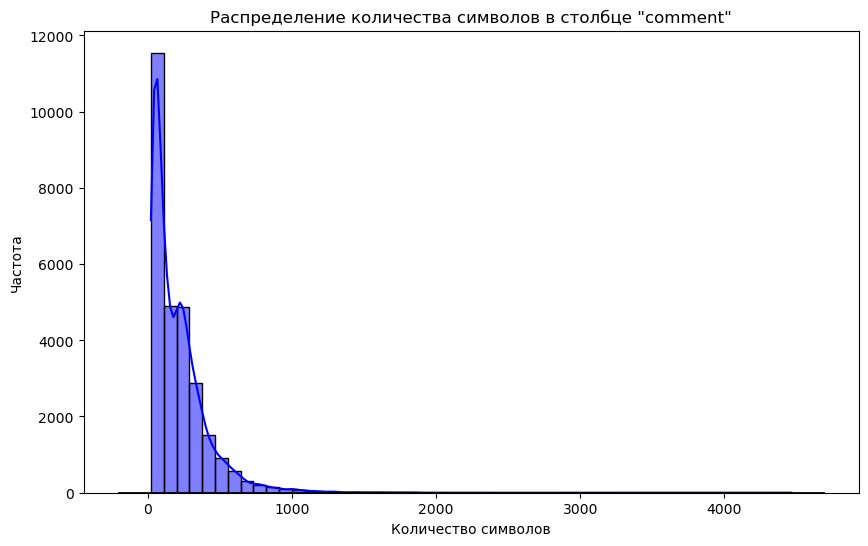

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Создание графика распределения количества символов
plt.figure(figsize=(10, 6))
sns.histplot(comments_correct_clean['comment'].str.len(), kde=True, color='blue', bins=50)

# Добавление оценки плотности нормального распределения
mu, std = norm.fit(comments_correct_clean['comment'].str.len())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Добавление подписей
plt.title('Распределение количества символов в столбце "comment"')
plt.xlabel('Количество символов')
plt.ylabel('Частота')

# Вывод графика
plt.show()

Теперь, когда наши входные данные стали более разумными, давайте преобразуем их так, чтобы наша модель могла их понять.

Исполоьзуем токенизатор RegexpTokenizer из библиотеки nltk для быстрой токенизации.

In [51]:
from nltk.tokenize import RegexpTokenizer

comments_correct_clean_token1 = comments_correct_clean
tokenizer = RegexpTokenizer(r'\w+')

comments_correct_clean_token1["tokens"] = comments_correct_clean_token1["comment"].apply(tokenizer.tokenize)
comments_correct_clean_token1

,id,comment,tokens
0,73,"отличный фильм! без соплей, зомби-апокалипсис ...","[отличный, фильм, без, соплей, зомби, апокалип..."
1,74,"на мой вкус, фильм поверхностный не хватило се...","[на, мой, вкус, фильм, поверхностный, не, хват..."
2,74,"хорошая,милая, пересмотрю","[хорошая, милая, пересмотрю]"
3,74,мне понравилась 10/10,"[мне, понравилась, 10, 10]"
4,74,"даже зарегалась для того, чтобы сказать — манг...","[даже, зарегалась, для, того, чтобы, сказать, ..."
...,...,...,...
29832,1294,прекрасная печальная любовь ? корейцы лучшие в...,"[прекрасная, печальная, любовь, корейцы, лучши..."
29833,1294,"если вы думаете , что эта дорама слишком хорош...","[если, вы, думаете, что, эта, дорама, слишком,..."
29834,1294,"как-то все уныло. до конца смотреть не стоит, ...","[как, то, все, уныло, до, конца, смотреть, не,..."
29835,1294,"очень понравился, поставила 10. очень напомнил...","[очень, понравился, поставила, 10, очень, напо..."


Как мы видим слова в предложениях разделены, но они стоят в разных наклонених, также нет очистки от лишних символов.

Более подробно проведем токенизацию.

In [52]:
comments_correct_clean_token2 = comments_correct_clean

def preprocess(text, stop_words, punctuation_marks, morph):
    tokens = word_tokenize(text.lower())
    preprocessed_text = []
    for token in tokens:
        if token not in punctuation_marks:
            lemma = morph.parse(token)[0].normal_form
            if lemma not in stop_words:
                preprocessed_text.append(lemma)
    return preprocessed_text

In [53]:
from nltk.corpus import stopwords
import pymorphy3
from nltk import word_tokenize

punctuation_marks = ['!', ',', '(', ')', ':', '-', '?', '.', '..', '...', '«', '»', ';', '–', '--',"''" , '\\', '10', "—"]
stop_words = stopwords.words("russian")
morph = pymorphy3.MorphAnalyzer()

In [54]:
comments_correct_clean_token2['tokens'] = comments_correct_clean_token2.apply(lambda row: preprocess(row['comment'], punctuation_marks, stop_words, morph), axis=1)

In [55]:
comments_correct_clean_token2

,id,comment,tokens
0,73,"отличный фильм! без соплей, зомби-апокалипсис ...","[отличный, фильм, сопля, зомби-апокалипсис]"
1,74,"на мой вкус, фильм поверхностный не хватило се...","[вкус, фильм, поверхностный, хватить, серия, з..."
2,74,"хорошая,милая, пересмотрю","[хороший, милый, пересмотреть]"
3,74,мне понравилась 10/10,"[понравиться, 10/10]"
4,74,"даже зарегалась для того, чтобы сказать — манг...","[зарегалася, сказать, манга, явно, интересный,..."
...,...,...,...
29832,1294,прекрасная печальная любовь ? корейцы лучшие в...,"[прекрасный, печальный, любовь, кореец, хороши..."
29833,1294,"если вы думаете , что эта дорама слишком хорош...","[думать, этот, дорама, слишком, хороший, ваш, ..."
29834,1294,"как-то все уныло. до конца смотреть не стоит, ...","[как-то, уныло, конец, смотреть, стоить, любит..."
29835,1294,"очень понравился, поставила 10. очень напомнил...","[очень, понравиться, поставить, 10., очень, на..."


In [56]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in comments_correct_clean_token2["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in comments_correct_clean_token2["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

576823 words total, with a vocabulary size of 42340
Max sentence length is 528


Текстовые данные имеют в общей сложности 579.066 слов, из которых 42.341 уникальных

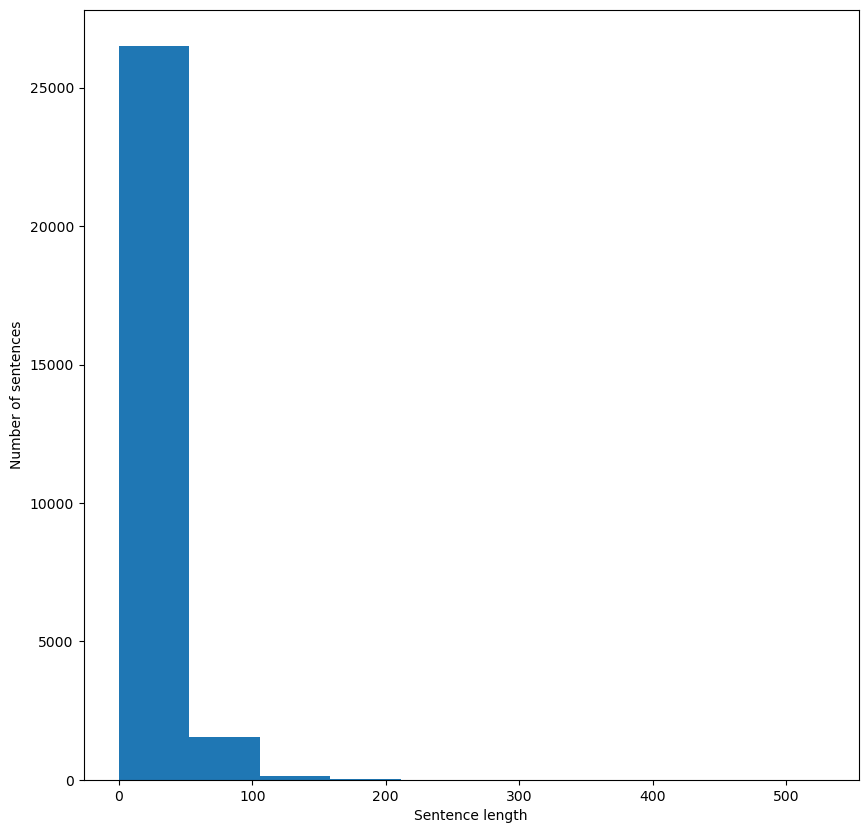

In [57]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

Определяем частоту слов

In [58]:
from collections import Counter

test_counter = Counter(comments_correct_clean_token2['tokens'][24462])
test_counter

Counter({'фильм': 18,
         'очень': 12,
         'семья': 8,
         'свой': 7,
         'который': 6,
         'второй': 5,
         'всё': 5,
         'актёр': 5,
         'один': 4,
         'жизнь': 4,
         'взаимоотношение': 4,
         'хороший': 4,
         'просто': 4,
         'немножко': 4,
         'первый': 3,
         'видеть': 3,
         'два': 3,
         'пак': 3,
         'богатый': 3,
         'корейский': 3,
         'олицетворять': 3,
         'время': 3,
         'понять': 3,
         'это': 3,
         'талантливый': 3,
         'сыграть': 3,
         'такой': 3,
         'сочувствие': 3,
         'качественный': 3,
         'популярный': 3,
         'роль': 3,
         'оскар': 2,
         'очередь': 2,
         'сюжет': 2,
         'кастома': 2,
         'корея': 2,
         'сказать': 2,
         'разный': 2,
         'мир': 2,
         'больший': 2,
         'общество': 2,
         '2': 2,
         'типичный': 2,
         'амплуа': 2,
         'фамил

In [59]:
words = Counter()

for txt in comments_correct_clean_token2['tokens']:
    words.update(txt)

len(words)

42340

In [60]:
words.most_common(100) # часто всречающиеся слова

[('фильм', 24325),
 ('очень', 11735),
 ('это', 7827),
 ('смотреть', 7049),
 ('понравиться', 5897),
 ('дорама', 5580),
 ('посмотреть', 5282),
 ('актёр', 5192),
 ('хороший', 4523),
 ('сюжет', 4316),
 ('просмотр', 4101),
 ('такой', 4058),
 ('просто', 3822),
 ('конец', 3080),
 ('который', 2980),
 ('герой', 2883),
 ('советовать', 2631),
 ('свой', 2628),
 ('интересный', 2580),
 ('весь', 2536),
 ('рекомендовать', 2489),
 ('человек', 2377),
 ('игра', 2311),
 ('главный', 2193),
 ('время', 2180),
 ('любовь', 2059),
 ('жизнь', 2059),
 ('история', 1993),
 ('всё', 1926),
 ('один', 1884),
 ('мочь', 1862),
 ('год', 1809),
 ('любить', 1729),
 ('сказать', 1680),
 ('первый', 1663),
 ('момент', 1661),
 ('думать', 1656),
 ('сам', 1609),
 ('роль', 1555),
 ('понять', 1497),
 ('отличный', 1480),
 ('красивый', 1457),
 ('вообще', 1414),
 ('стоить', 1367),
 ('хотеть', 1350),
 ('немного', 1327),
 ('тот', 1303),
 ('этот', 1296),
 ('быть', 1280),
 ('знать', 1261),
 ('классный', 1256),
 ('самый', 1245),
 ('прекрасн

In [61]:
import gensim

model_path = r"F:\beeranddrams\base\model.bin"
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)


Проверка работоспособности словоря.

In [62]:
word_vector = model["солнце_NOUN", "алкоголь_NOUN", "пиво_NOUN", "угар_NOUN", "хмель_NOUN", "мат_NOUN", "трезвый_NOUN", "душевно_NOUN", "вино_NOUN","мат_NOUN", "веселый_NOUN"]
print(word_vector)

[[-4.0472946  -1.4410981  -0.72920346 ... -2.023993   -1.2292678
   0.1914636 ]
 [ 1.7320822  -1.1064229   4.2394876  ...  0.31309098  4.3683395
  -1.2338072 ]
 [-0.7403311   1.2414607  -0.03133442 ... -0.35185948  2.091816
  -0.9011193 ]
 ...
 [ 0.19501296 -0.20126426  0.01394349 ... -2.1746614   2.1793306
   0.55422604]
 [-0.21004376 -0.5691009   1.3394607  ...  0.3725333   0.9877221
  -0.6840793 ]
 [-0.1384015   1.0162544  -0.5029898  ... -1.5415183  -0.00555816
   1.3025554 ]]


Добавляем "_NOUN" к каждому элементу токена для обрабтки словарем.

In [63]:
comments_correct_clean_token2["tokens"] = comments_correct_clean_token2["tokens"].apply(lambda tokens: [token + "_NOUN" for token in tokens])
comments_correct_clean_token2

,id,comment,tokens
0,73,"отличный фильм! без соплей, зомби-апокалипсис ...","[отличный_NOUN, фильм_NOUN, сопля_NOUN, зомби-..."
1,74,"на мой вкус, фильм поверхностный не хватило се...","[вкус_NOUN, фильм_NOUN, поверхностный_NOUN, хв..."
2,74,"хорошая,милая, пересмотрю","[хороший_NOUN, милый_NOUN, пересмотреть_NOUN]"
3,74,мне понравилась 10/10,"[понравиться_NOUN, 10/10_NOUN]"
4,74,"даже зарегалась для того, чтобы сказать — манг...","[зарегалася_NOUN, сказать_NOUN, манга_NOUN, яв..."
...,...,...,...
29832,1294,прекрасная печальная любовь ? корейцы лучшие в...,"[прекрасный_NOUN, печальный_NOUN, любовь_NOUN,..."
29833,1294,"если вы думаете , что эта дорама слишком хорош...","[думать_NOUN, этот_NOUN, дорама_NOUN, слишком_..."
29834,1294,"как-то все уныло. до конца смотреть не стоит, ...","[как-то_NOUN, уныло_NOUN, конец_NOUN, смотреть..."
29835,1294,"очень понравился, поставила 10. очень напомнил...","[очень_NOUN, понравиться_NOUN, поставить_NOUN,..."


In [64]:
import re
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Определение весов ключевых слов
keyword_weights = {
    "пивко_NOUN": 2.5,
    "пьяный_NOUN": 3.5,
    "алкоголь_NOUN": 3.2,
    "пиво_NOUN": 5.5,
    "кружка_NOUN": 3.3,
    "выпивка_NOUN": 3.1,
    "водка_NOUN": 1.7,
    "душевно_NOUN": 1.4,
    "вино_NOUN": 1.1,
    "мат_NOUN": 0.7
}

# Функция для вычисления векторов
def calculate_vectors(tokens):
    return np.mean([model[token] * keyword_weights.get(token, 1) for token in tokens if token in model.key_to_index], axis=0) \
        if any(token in model.key_to_index for token in tokens) else np.zeros(model.vector_size)

# Применение функции к столбцу tokens
comments_correct_clean_token2["vectors"] = comments_correct_clean_token2["tokens"].apply(calculate_vectors)

# Вычисление целевого вектора с учетом весов
target_keywords = ["пивко_NOUN", "пьяный_NOUN", "алкоголь_NOUN", "пиво_NOUN", "угар_NOUN",
                "хмель_NOUN", "мат_NOUN", "трезвый_NOUN", "душевно_NOUN", "вино_NOUN","мат_NOUN"] 
target_vector = np.mean([model[keyword] * keyword_weights.get(keyword, 1) for keyword in target_keywords if keyword in model], axis=0)

# Преобразование векторов и целевого вектора в списки списков
vectors_list = comments_correct_clean_token2["vectors"].tolist()
target_vector_list = [target_vector.tolist()]

# Рассчет косинусного сходства
cosine_similarities = cosine_similarity(vectors_list, target_vector_list)

# Добавление результатов в DataFrame
comments_correct_clean_token2["cosine_similarity"] = cosine_similarities


In [65]:
comments_correct_clean_token2.head(20)

,id,comment,tokens,vectors,cosine_similarity
0,73,"отличный фильм! без соплей, зомби-апокалипсис ...","[отличный_NOUN, фильм_NOUN, сопля_NOUN, зомби-...","[0.8093732, -0.51693344, -0.3228059, -0.456564...",0.047675
1,74,"на мой вкус, фильм поверхностный не хватило се...","[вкус_NOUN, фильм_NOUN, поверхностный_NOUN, хв...","[0.44184837, -0.68330216, 0.12773488, -0.76108...",-0.048223
2,74,"хорошая,милая, пересмотрю","[хороший_NOUN, милый_NOUN, пересмотреть_NOUN]","[0.7236489, -0.16641878, -0.56850666, -0.56128...",-0.001090
3,74,мне понравилась 10/10,"[понравиться_NOUN, 10/10_NOUN]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000
4,74,"даже зарегалась для того, чтобы сказать — манг...","[зарегалася_NOUN, сказать_NOUN, манга_NOUN, яв...","[-0.07895446, -0.009434059, -0.4680415, -0.051...",0.062342
5,74,зачем такая разница в возрасте между героями. ...,"[такой_NOUN, разница_NOUN, возраст_NOUN, герой...","[-0.091090456, -0.95113134, 1.2720368, -0.5774...",0.004693
6,74,легкий и веселый фильм для вечернего просмотра,"[лёгкий_NOUN, весёлый_NOUN, фильм_NOUN, вечерн...","[1.3324277, -0.91051793, -0.10816757, -0.08989...",0.041155
7,74,"слабовато для такой высокой оценки, ожидала бо...","[слабовато_NOUN, высокий_NOUN, оценка_NOUN, ож...","[0.044199407, -0.62589407, 0.3595082, -0.56261...",0.027019
8,74,"дорама очень лёгкая, милая и светлая))) и пуст...","[дорама_NOUN, очень_NOUN, лёгкий_NOUN, милый_N...","[0.008418237, 0.09400029, -0.0017659572, -0.51...",0.090481
9,74,шикарная дорама. 10/10,"[шикарный_NOUN, дорама_NOUN, 10/10_NOUN]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000


In [66]:
# Вычисление среднего значения для каждого уникального 'id'
average_by_id = comments_correct_clean_token2.groupby('id')['cosine_similarity'].mean().reset_index()

# Вывод средних значений
print(average_by_id[['id', 'cosine_similarity']])


       id  cosine_similarity
0      72           0.033519
1      73           0.060323
2      74           0.044186
3      75           0.052753
4      76           0.048312
..    ...                ...
979  1306           0.021050
980  1307          -0.002769
981  1309           0.030868
982  1313           0.032799
983  1380           0.050364

[984 rows x 2 columns]


In [67]:
# Сортировка DataFrame по столбцу 'cosine_similarity' в порядке убывания
top_cosine_similarity = comments_correct_clean_token2.sort_values(by='cosine_similarity', ascending=False)

# Вывод топ-10 значений
top_10_cosine_similarity = top_cosine_similarity.head(10)
print(top_10_cosine_similarity[['id', 'cosine_similarity']])


         id  cosine_similarity
21268   251           0.727679
26774  1075           0.637444
3118    257           0.571831
20588   275           0.533221
931     194           0.515426
13730   730           0.513705
2992    254           0.507146
28236  1258           0.474683
24424    73           0.463515
25506   310           0.460116
